In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('HK300_subsample.csv')
n = len(df)

In [4]:
mu = np.mean(df['subs'])

In [5]:
sigma = np.std(df['subs'])

In [9]:
x = np.random.randn(20)
print( [np.mean(x), np.std(x)])

[-0.23873712781550732, 1.0080854105357477]


In [19]:
# define an function to compute confidence interval
def CI(x):

    x = np.array(x)
    n = len(x)

    mu, sig = ( np.mean(x), np.std(x) )

    upper, lower =  (mu + 1.96 / np.sqrt(n) * sig,
                     mu - 1.96 / np.sqrt(n) * sig)

    return ({'upper': upper, 'lower': lower})

# compute confidence interval for the number of subscribers
CI(df['subs'])


KeyError: 0

In [21]:
Rep = 1000
sample_size = 10
capture = np.zeros(Rep)
Bounds = np.zeros((Rep,2))

for i in range(Rep):
    mu = 2
    x = np.random.poisson(mu,sample_size)
    bounds = CI(x)
    capture[i] = (bounds['lower'] <= mu <= bounds['upper'])
    Bounds[i,:] = [bounds['lower'], bounds['upper']]

print('empirical coverage probability: ', np.mean(capture))

empirical coverage probability:  0.894


In [24]:
Bound25 = Bounds[0:25, :]
print(Bound25)

[[0.86613574 2.53386426]
 [1.73617935 2.66382065]
 [1.91355382 3.48644618]
 [1.13244805 2.46755195]
 [1.19603523 2.60396477]
 [0.86488741 2.13511259]
 [0.74217422 1.85782578]
 [0.70981278 2.09018722]
 [1.43183142 3.36816858]
 [0.97773386 2.62226614]
 [1.16206269 3.03793731]
 [0.51355382 2.08644618]
 [1.16844243 2.83155757]
 [1.65623229 3.14376771]
 [0.53244805 1.86755195]
 [0.9058062  3.4941938 ]
 [1.31586149 3.68413851]
 [1.32103608 2.67896392]
 [1.24783531 3.15216469]
 [0.84632908 2.95367092]
 [1.25966529 2.34033471]
 [1.28434844 3.51565156]
 [1.51933058 3.68066942]
 [1.80830973 3.79169027]
 [1.83193803 2.96806197]]


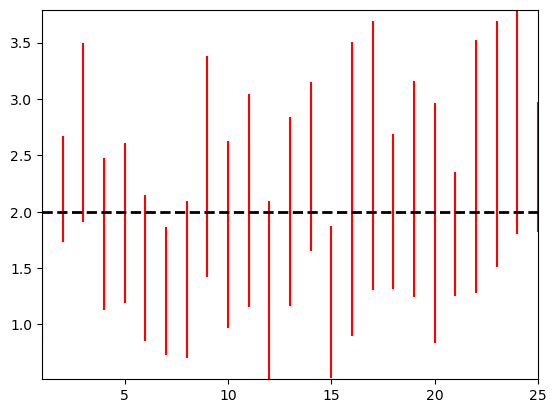

In [35]:
import matplotlib.pyplot as plt
# plt.plot(1)
plt.xlim([1, 25])
plt.ylim([np.min(Bound25), np.max(Bound25)])
for i in range(25):
    plt.plot([i+1, i+1], [Bound25[i, 0], Bound25[i, 1]], color='red')
plt.axhline(y=2, color='black', linestyle='--', linewidth=2)


In [40]:
df_pop = pd.read_csv('HK295.csv')
N = len(df_pop)

In [41]:
np.mean(df_pop['count'])

6.170330768762556

In [45]:
np.corrcoef(df_pop['subs'], df_pop['view'])

In [49]:
# np.cov returns the 2*2 matrix
np.cov(df_pop['subs'], df_pop['view'])[0,1]

0.8541280431637372

In [71]:
# a function with no arguments

def subsample_mean():
    index_sub = np.random.choice(range(N), size=100, replace=False)
    return np.mean(df_pop.loc[index_sub, 'count'])

many_means = [subsample_mean() for j in range(1000)]

(array([  1.,   2.,  29.,  81., 180., 246., 247., 142.,  57.,  15.]),
 array([5.65031139, 5.73885633, 5.82740126, 5.91594619, 6.00449113,
        6.09303606, 6.181581  , 6.27012593, 6.35867086, 6.4472158 ,
        6.53576073]),
 <BarContainer object of 10 artists>)

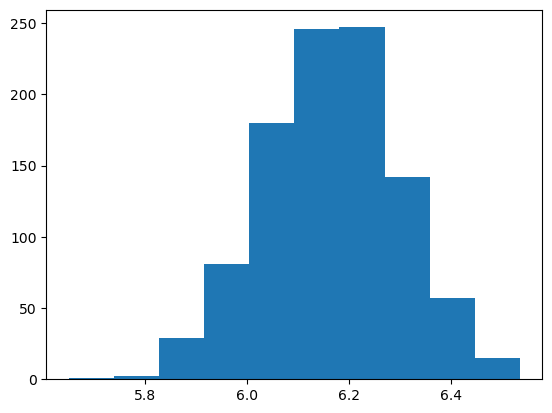

In [72]:
plt.hist(many_means)

In [59]:
index_sub = np.random.choice(range(N), size=100, replace=False)
print(index_sub)

[137 130  49  87  19 190  77 155 236 131   8 260 109 113 217  82  55  95
 166  43 115 209 162  25  34  35  23 188  96 246   4   3 266  84 170  37
 129  40 291  99 112  14 192 253 264 144 111 245 174  32 263 208  28 104
 127  71 242  90 234 206 205 122 223 140 221 172  81   9 211  93  74  57
 222  76 214 116 218 128 169 216 185 107 117 239 143  21 262  80  92 292
 252  97 237  18 248  16 121 189 176 100]
